<a href="https://colab.research.google.com/github/vinniedean/collab/blob/main/SFO_Art_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/openai/whisper.git


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-cin2wm6e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-cin2wm6e
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=802825 sha256=91dd6cbca27bc1788da8b4b76a7e81b4bebf29bc53de1707620608eca025667c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ta90uihx/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [2]:
import whisper

# Load the model, for example, the "small" model
model = whisper.load_model("small")


100%|███████████████████████████████████████| 461M/461M [00:05<00:00, 93.9MiB/s]


In [4]:
# Specify the path to your audio file
audio_path = "/content/International_Main_Hall_4.m4a"

# Transcribe the audio
result = model.transcribe(audio_path)

# Print the transcription
print(result["text"])


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Rupert Garcia, American born 1941, bird technology, 1999, hand painted ceramic tile. This work combines two images, a bird that symbolizes natural flight and the geometric grid that symbolizes the technological advances that made human flight possible. Implicit in the work is the potential for conflict between the natural world and technology. The city and county of San Francisco, commissioned by the San Francisco Arts Commission and the Art Commission for the San Francisco International Airport.


In [5]:
!pip install pymupdf nltk gensim matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 43.0 MB/s eta 0:00:00


In [6]:
import fitz  # PyMuPDF
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
pdf_path = '/content/Rupert Garcia.pdf'  # Update this path
doc = fitz.open(pdf_path)
text = ""
for page in doc:
    text += page.get_text()


In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')

# Preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_text = preprocess_text(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
from gensim import corpora, models

# Tokenize cleaned text
tokens = [word for word in cleaned_text.split()]

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(token) for token in [tokens]]

# Using LDA for topic modeling
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.054*"francisco" + 0.054*"san" + 0.037*"technology" + 0.037*"symbolizes"')
(1, '0.026*"francisco" + 0.026*"san" + 0.026*"natural" + 0.026*"work"')
(2, '0.026*"san" + 0.026*"natural" + 0.026*"francisco" + 0.026*"work"')
(3, '0.026*"francisco" + 0.026*"natural" + 0.026*"bird" + 0.026*"san"')
(4, '0.026*"san" + 0.026*"natural" + 0.026*"francisco" + 0.026*"art"')


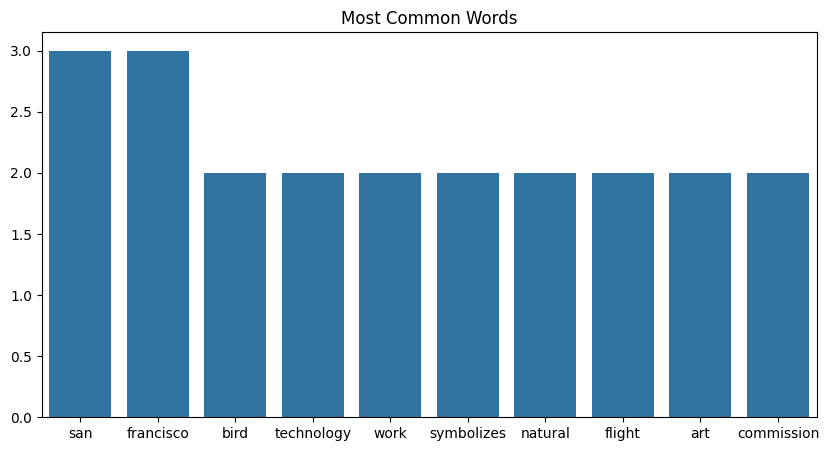

In [11]:
from collections import Counter
import seaborn as sns

word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

words = [word[0] for word in most_common_words]
counts = [word[1] for word in most_common_words]

plt.figure(figsize=(10, 5))
sns.barplot(x=words, y=counts)
plt.title('Most Common Words')
plt.show()


In [12]:
!pip install networkx matplotlib


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter


In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

# Assuming `cleaned_text` is your preprocessed text data
sentences = sent_tokenize(cleaned_text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# Define the window size (sentence-wise co-occurrence)
window_size = 2  # This is just illustrative; we're using sentences, so it's not used here

# Create a list of all word pairs within the same sentence
word_pairs = []
for sentence in tokenized_sentences:
    # Using combinations to create pairs of words in the same sentence
    word_pairs.extend(list(combinations(sentence, 2)))

# Count the occurrences of each pair to understand the strength of connections
pair_counts = Counter(word_pairs)


In [16]:
# Initialize a graph
G = nx.Graph()

# Add edges between words with weights
for pair, count in pair_counts.items():
    word1, word2 = pair
    G.add_edge(word1, word2, weight=count)


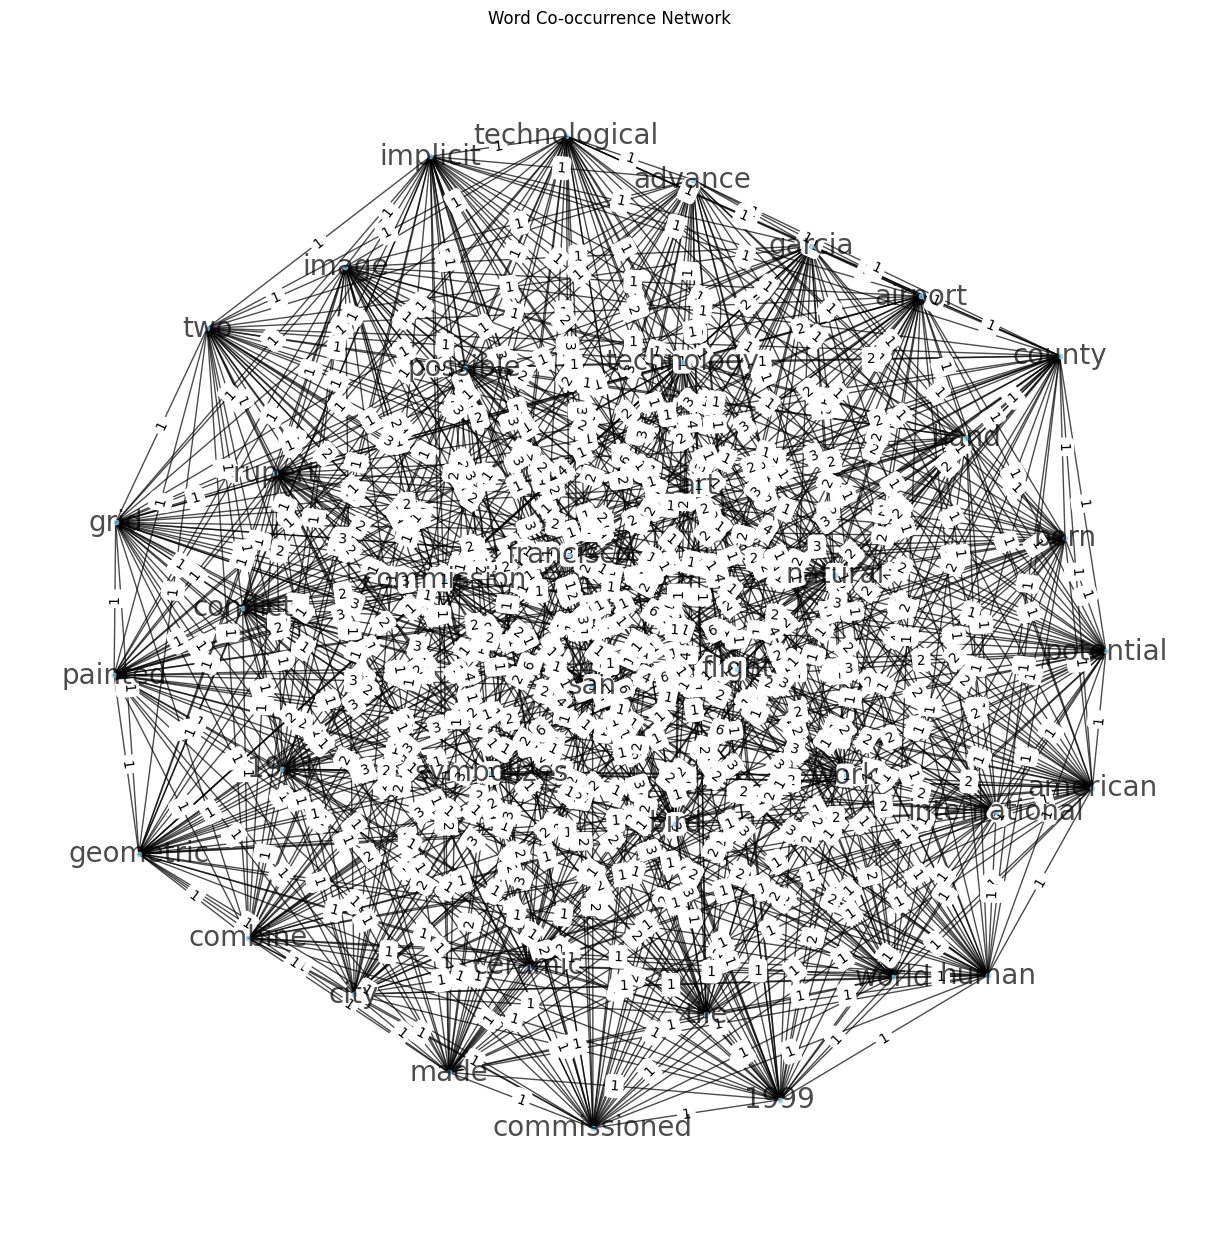

In [17]:
plt.figure(figsize=(12, 12))

# Layout for our nodes
pos = nx.spring_layout(G, k=0.1)

# Drawing the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', linewidths=1, font_size=20, node_size=10, alpha=0.7)

# Considering edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

plt.title("Word Co-occurrence Network")
plt.show()


In [18]:
# Calculate degree centrality
degrees = dict(G.degree())

# Sort nodes by degree centrality
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Let's say we're interested in the top 5 nodes
key_nodes = [node[0] for node in sorted_degrees[:5]]
print("Key nodes:", key_nodes)


Key nodes: ['bird', 'technology', 'work', 'symbolizes', 'natural']


In [19]:
# Choose a key node. For demonstration, let's use the first key node identified
key_node = key_nodes[0]

# Extract a subgraph centered around the key node
# This example uses ego_graph to get all nodes connected directly to the key node
subgraph = nx.ego_graph(G, key_node)

# For a larger radius (more steps away), you can use the radius parameter
# subgraph = nx.ego_graph(G, key_node, radius=2)


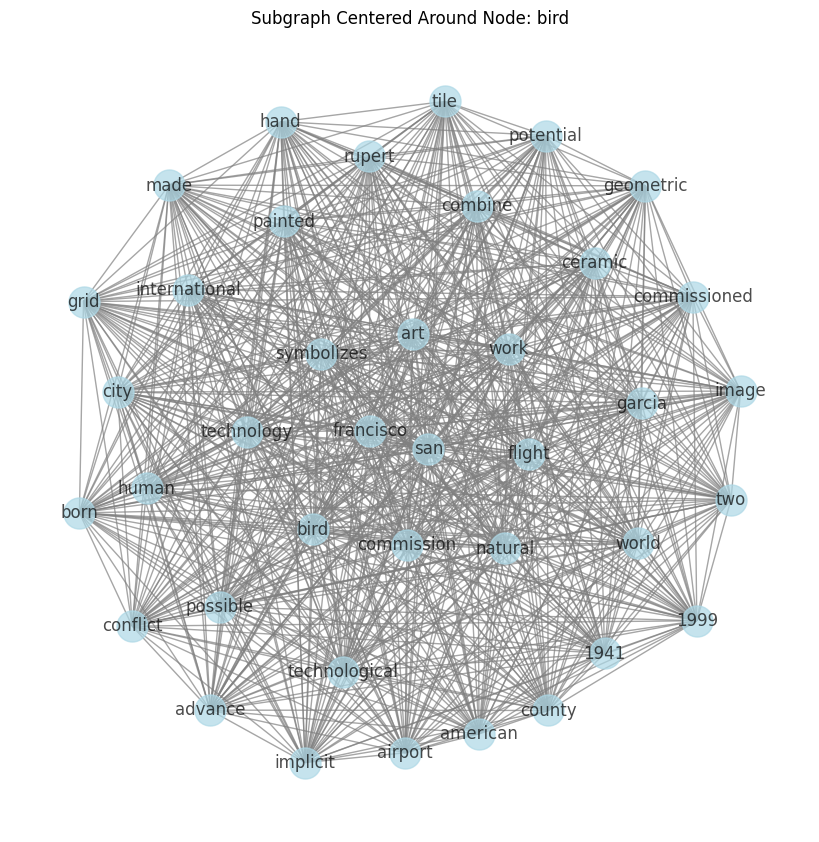

In [20]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', linewidths=1, font_size=12, node_size=500, alpha=0.7)
plt.title(f"Subgraph Centered Around Node: {key_node}")
plt.show()
